# **Data Loading and Preprocessing**

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

# **1. Load the Dataset**

In [47]:
data = pd.read_csv('onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


# **2. Handle Missing Values**

In [48]:
missing_values = data.isnull().sum()

print(f"Missing Values Count: \n{missing_values}")

Missing Values Count: 
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64




> **There are no missing values**



# **3. Encode Categorical Variables**

In [49]:
data_dummies = data.copy()
data_dummies = pd.get_dummies(data)
data_dummies.head()

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
1,24,3,12.9770,77.5773,560009,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,22,3,12.9551,77.6593,560017,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,22,6,12.9473,77.5616,560019,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4,22,4,12.9850,77.5533,560010,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1


# **4. Feature Selection**

### **Included Features:**
1. **Age:** People of different ages have different food preferences, so knowing their age helps understand their reviews better.
2. **Family Size:** How many people are in a family can affect how much food they order and what they expect from it.
3. **Latitude and Longitude:** While exact coordinates don't matter, knowing the general area helps catch regional trends in reviews.
4. **Gender:** Men and women may give different feedback, so it's important to consider gender.
5. **Marital Status:** Whether someone is married or not can change what they look for in their food orders.
6. **Occupation:** What people do for work can say a lot about what they want in their food and service.
7. **Monthly Income:** How much money someone makes each month can affect their food choices and how they rate their orders.
8. **Educational Qualifications:** Knowing how educated someone is can give insights into their preferences and expectations.
9. **Feedback_Negative:** This is crucial for understanding what went wrong with an order.

### **Excluded Features:**
1. **Pin Code:** Exact location codes aren't needed; general location trends are captured by latitude and longitude.
2. **Output_No and Output_Yes:** These just duplicate the information already given by 'Negative Feedback.'
3. **Unnamed: 12_No and Unnamed: 12_Yes:** These don't have clear meanings, so they're not useful for understanding feedback.
4. **Monthly Income_No Income:** Having a separate category for "no income" could confuse things and isn't necessary.
5. **Feedback_Positive:** We only need to know if the feedback is negative; knowing it's not negative implies it's positive.

In [50]:
X = data_dummies.drop(['Pin code', 'Output_No', 'Output_Yes', 'Unnamed: 12_No', 'Unnamed: 12_Yes', 'Monthly Income_No Income', 'Feedback_Positive', 'Feedback_Negative '], axis=1)
y = data_dummies['Feedback_Negative ']

# **Exploratory Data Analysis**

# **5. Descriptive Statistics**

In [51]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


1. **Age Distribution:**
- People in our dataset are between 18 and 33 years old.
- The average age is around 24.63 years.
- Most people are between 23 and 26 years old, as indicated by the 25th and 75th percentiles.

2. **Family Size:**

- Families in our data range from 1 to 6 members.
- On average, families have about 3.28 members.
- Most families have between 2 to 4 members, as indicated by the 25th and 75th percentiles.

3. **Location:**

- The latitude and longitude values correspond to the geographical location.
- Latitude ranges from about 12.8652 to 13.102, while longitude ranges from about 77.4842 to 77.7582.
- This data seems to be from a particular place, maybe a city or a big area.

4. **Pin Code:**

- The pin code data shows the range, mean, and standard deviation.
- The average pin code is roughly 560040.11
- Pin codes range from 560001 to 560109.

# **6. Visualizations**

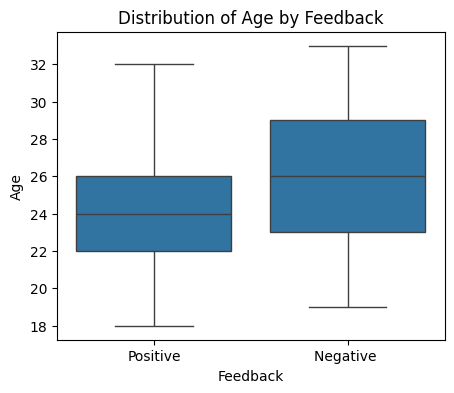

In [52]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='Feedback', y='Age', data=data)
plt.title('Distribution of Age by Feedback')
plt.xlabel('Feedback')
plt.ylabel('Age')
plt.show()

<Figure size 1000x600 with 0 Axes>

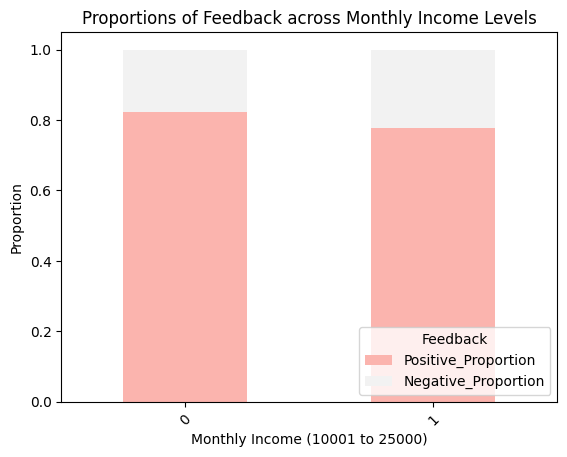

In [53]:
income_feedback = data_dummies.groupby(['Monthly Income_10001 to 25000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(10, 6))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income (10001 to 25000)')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1000x600 with 0 Axes>

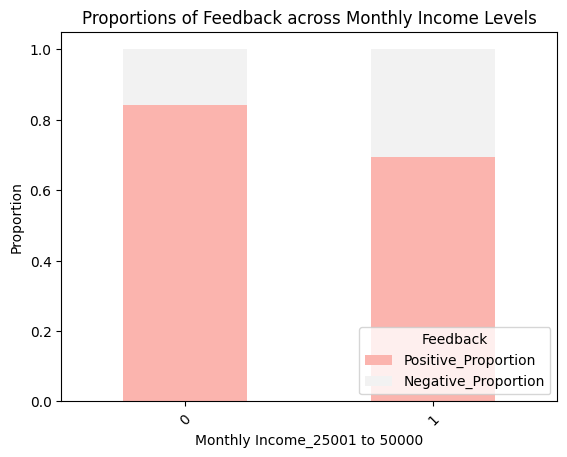

In [54]:
income_feedback = data_dummies.groupby(['Monthly Income_25001 to 50000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(10, 6))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income_25001 to 50000')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1000x600 with 0 Axes>

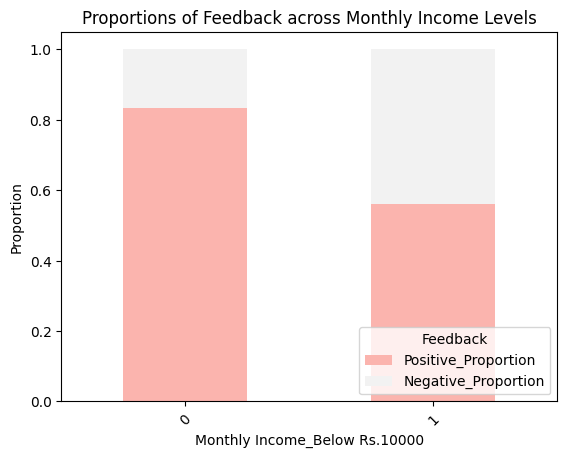

In [55]:
income_feedback = data_dummies.groupby(['Monthly Income_Below Rs.10000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(10, 6))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income_Below Rs.10000')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1000x600 with 0 Axes>

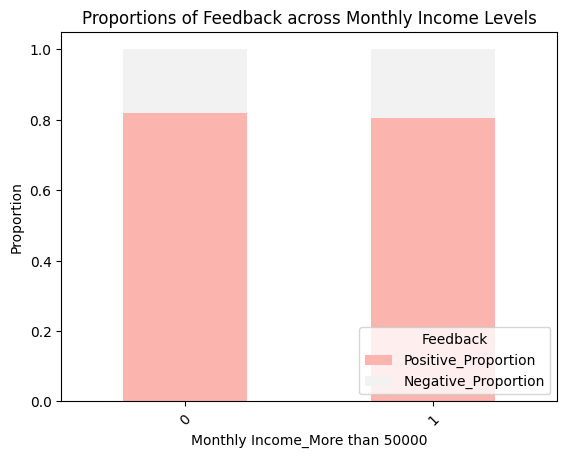

In [56]:
income_feedback = data_dummies.groupby(['Monthly Income_More than 50000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(10, 6))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income_More than 50000')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1000x600 with 0 Axes>

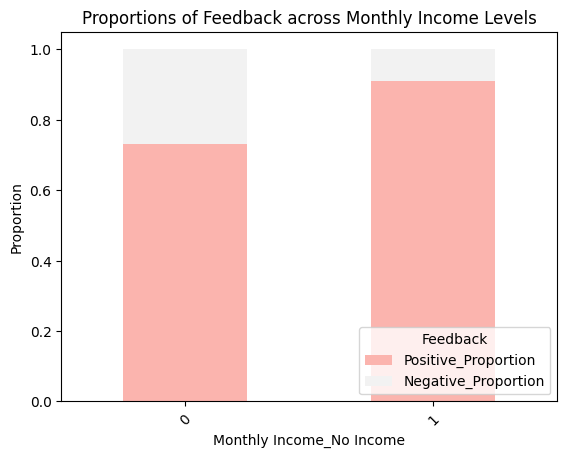

In [41]:
income_feedback = data_dummies.groupby(['Monthly Income_No Income', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(10, 6))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income_No Income')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<ipython-input-40-e8289f329b47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


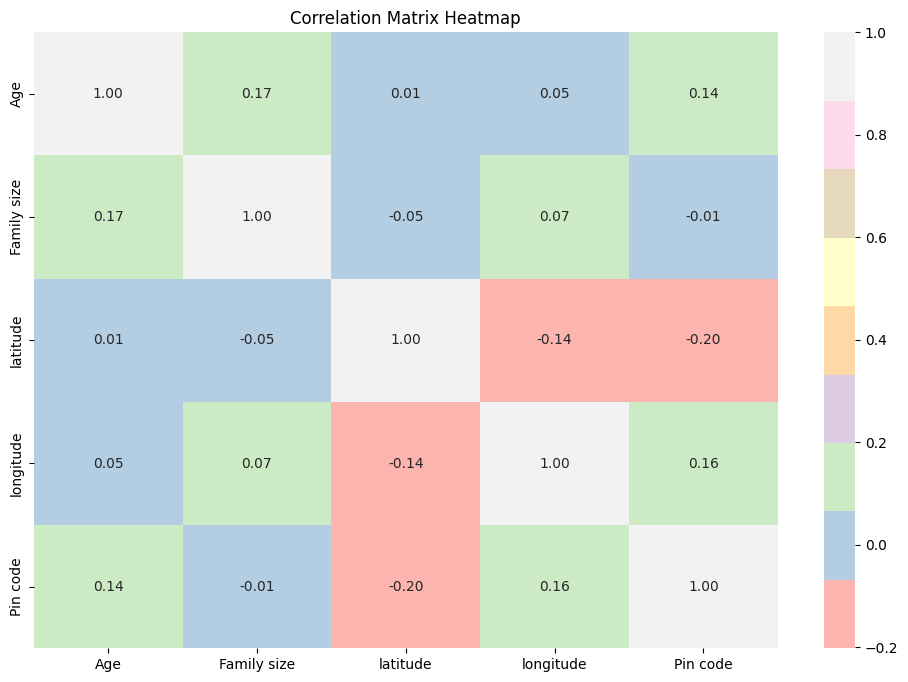

In [40]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Logistic Regression Model**

# **7. Build the Model**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test_scaled)

# **8. Model Evaluation**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

Accuracy: 0.8461538461538461
Precision: 0.4
Recall: 0.18181818181818182


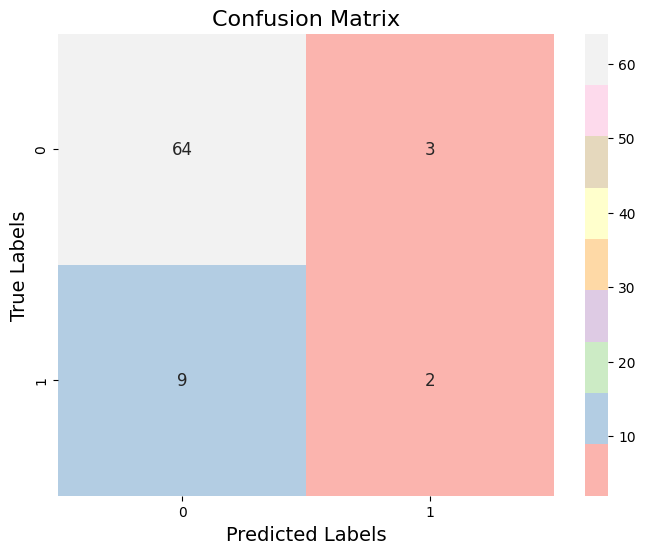

In [43]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Pastel1", fmt="d", annot_kws={"size": 12})

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# **Data Analysis and Visualization**

# **9. Feature Importance**

<ipython-input-44-99368fd8096a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='Pastel1')


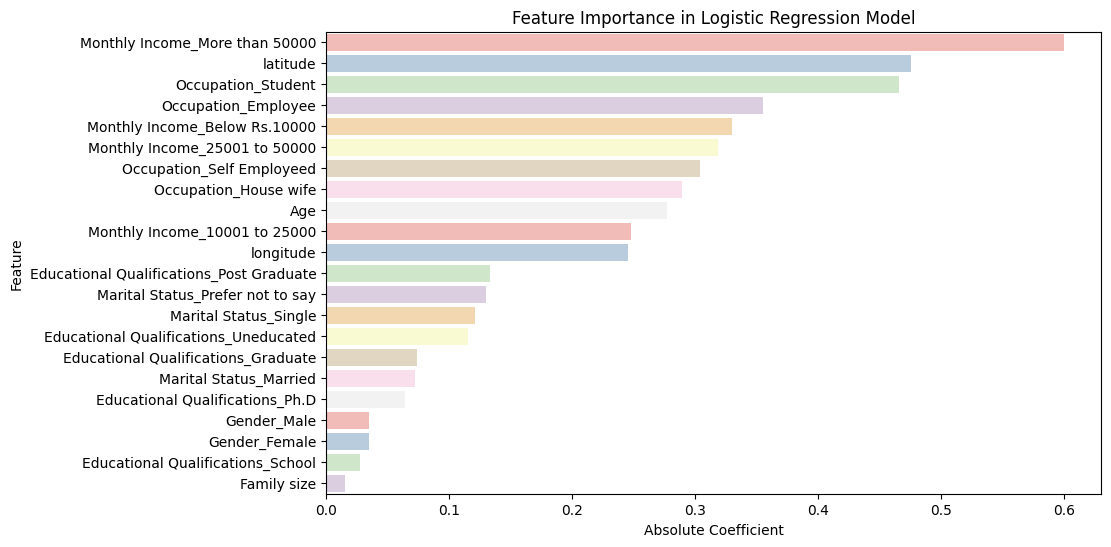

In [44]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='Pastel1')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

# **10. Prediction Insights**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


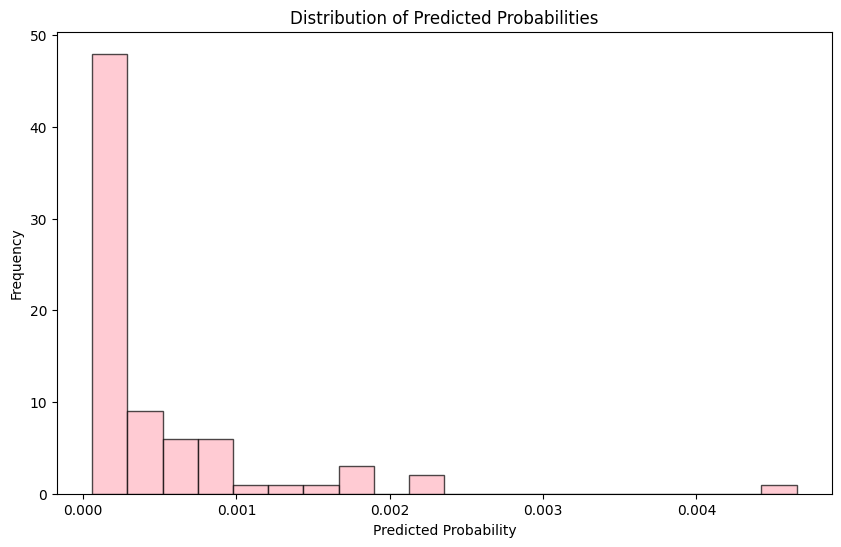

In [45]:
probabilities = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(probabilities, bins=20, color='lightpink', edgecolor='black', alpha=0.7)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()